In [1]:
import pandas as pd
import sqlite3

## make a connection to the database

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## analyze only the users and not the admins

In [3]:
query = '''
SELECT *
FROM checker
WHERE uid LIKE 'user_%'
'''
checker = pd.io.sql.read_sql(query, conn)
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
print(checker['timestamp'].dtypes)

object


In [5]:
checker_new =  pd.DataFrame((pd.to_datetime(checker['timestamp'])).copy())
checker_new.columns=['datetime']
checker_new

,datetime
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [6]:
checker_new['hour'] = checker_new['datetime'].dt.hour
checker_new['date'] = checker_new['datetime'].dt.date
bins = [0, 4, 10, 17, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
checker_new['time_of_day'] = pd.cut(checker_new['hour'], bins=bins, labels=labels, right=False)
checker_new.drop('datetime', axis=1, inplace=True)
checker_new

,hour,date,time_of_day
0,5,2020-04-17,morning
1,5,2020-04-17,morning
2,5,2020-04-17,morning
3,5,2020-04-17,morning
4,5,2020-04-17,morning
...,...,...,...
3202,20,2020-05-21,evening
3203,20,2020-05-21,evening
3204,20,2020-05-21,evening
3205,20,2020-05-21,evening


In [7]:
commits = checker_new.groupby('time_of_day', observed=False).date.value_counts().unstack(0)
commits

time_of_day,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


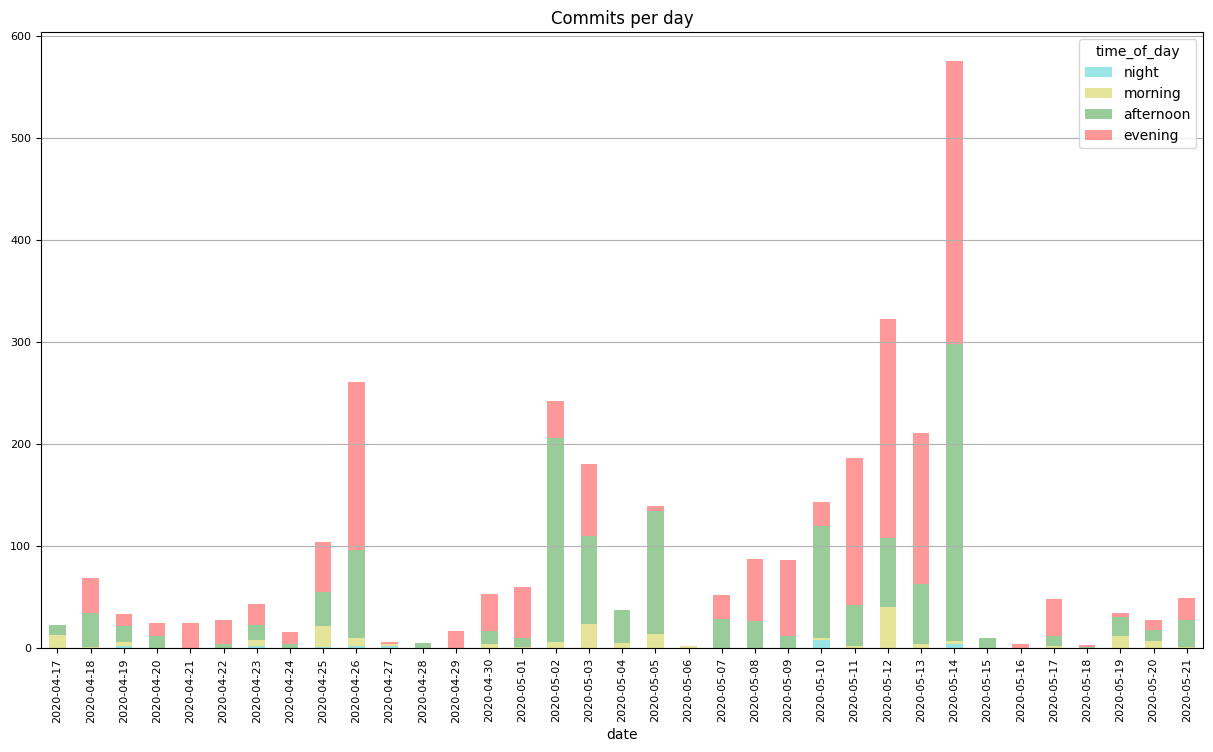

In [8]:
plt = commits.plot.bar(figsize=(15, 8),fontsize=8,title='Commits per day',rot=90,alpha=0.4,stacked=True,color=('c', 'y', 'g', 'r'))
plt.grid(axis='y')

## When do our users usually commit the labs: in the night, morning, afternoon,or evening?” The answer is afternoon, evening.

## Which day has: the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon? The answer is:2020-05-12

In [9]:
conn.close()